# Velocity of particles

In [1]:
import xarray as xr
import numpy as np
import matplotlib.cm as cm

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import copy as cp

In [2]:
NTEST = 'k-cosine-w-cos_30noresamp'
path_save = '/storage/mathilde/MainProject/1_ExternalProcesses/LagrangianTracking/Clustering/Last_Version/config_k-cosine-w-cos_30noresampnoresamp_goodw/'
path_figs = '/storage/mathilde/MainProject/1_ExternalProcesses/LagrangianTracking/Clustering/Last_Version/config_k-cosine-w-cos_30noresampnoresamp_goodw/Figs/'
Dataset_path = '/storage/mathilde/MainProject/1_ExternalProcesses/LagrangianTracking/Clustering/training_25years_100000.nc'

path_clusters = '/storage/mathilde/MainProject/1_ExternalProcesses/LagrangianTracking/Clustering/Last_Version/config_k-cosine-w-cos_30noresampnoresamp_goodw/ClassifiedData/'
path_figs = '/storage/mathilde/MainProject/1_ExternalProcesses/LagrangianTracking/Clustering/Last_Version/config_k-cosine-w-cos_30noresampnoresamp_goodw/Figs/'

lats_all = [] ; lons_all = [] ; depths_all = [] ; labels_all = []
for yr in range(1993,2014):#2017
    print('Year', yr)
    labels_all.extend( np.load(path_clusters+'labels_data_'+str(yr)+'.npy', allow_pickle = True) )
    depths_all.extend( np.load(path_clusters+'depths_'+str(yr)+'.npy', allow_pickle = True) )
    lats_all.extend( np.load(path_clusters+'lats_'+str(yr)+'.npy', allow_pickle = True) )
    lons_all.extend( np.load(path_clusters+'lons_'+str(yr)+'.npy', allow_pickle = True) )
    
lats_all = np.array(lats_all)
lons_all = np.array(lons_all)
depths_all = np.array(depths_all)

Year 1993
Year 1994
Year 1995
Year 1996
Year 1997
Year 1998
Year 1999
Year 2000
Year 2001
Year 2002
Year 2003
Year 2004
Year 2005
Year 2006
Year 2007
Year 2008
Year 2009
Year 2010
Year 2011
Year 2012
Year 2013


In [3]:
# Calculate approximate velocities
dlat = lats_all - np.roll(lats_all, 1, axis=1)
dlon = lons_all - np.roll(lons_all, 1, axis=1)
velocities = np.sqrt(dlat**2+dlon**2) # velocity in lat/lon for now

In [4]:
# plot density plots for each group

#Col = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:cyan']
Col = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:cyan']

L1 = [1,3,6,7,8,9,10,18,19,23,27,29] # Retro
L2 = [21] # Slope Sea avant retro
L3 = [2,17,21,22,25] # Slope Sea
L4 = [26] # Labrador Sea
L5 = [0,4,5,12,13,14,15,16,20] # Labrador Shelf
L6 = [11,28] # South
L7 = [24] # Belle Isle
#Ls = [L1,L2,L3,L4,L5,L6,L7]
Ls = [L1,L3,L4,L5,L6,L7]
#labels = ['Retroflected', 'Westward,\nthen retroflected', 'Westward-flowing', 'Labrador Sea', 'Labrador Shelf', 'Southward-flowing', 'Belle Isle']
labels = ['Retroflected', 'Westward-flowing', 'Labrador Sea', 'Labrador Shelf', 'Southward-flowing', 'Belle Isle']



In [ ]:
vel_all = [] 
for superclust in Ls:
    vel = [] 
    for n in range(len(labels_all)):
        if labels_all[n] in superclust :
            dum = velocities[n,:]
            vel.extend(dum[dum!=0])
    vel_all.append(vel) 
    
vel_all_shelf = [] 
for superclust in Ls:
    vel = [] 
    for n in range(len(labels_all)):
        if labels_all[n] in superclust :
            dum = velocities[n,0:100]
            vel.extend(dum[dum!=0])
    vel_all_shelf.append(vel) 

In [ ]:
# cut: 50 days 

lons_all_50 = [] ; lons_all_0 = []
for superclust in Ls:
    lons_50 = [] ; lons_0 = []
    for n in range(len(labels_all)):
        if labels_all[n] in superclust :
            lons_50.extend(lons_all[n,0:50])
            lons_0.append(lons_all[n,0])
    lons_all_50.append(lons_50)
    lons_all_0.append(lons_0)

0 / 6
Max at 0.046
1 / 6
Max at 0.058
2 / 6
Max at 0.034
3 / 6
Max at 0.070
4 / 6
Max at 0.024
5 / 6
Max at 0.038


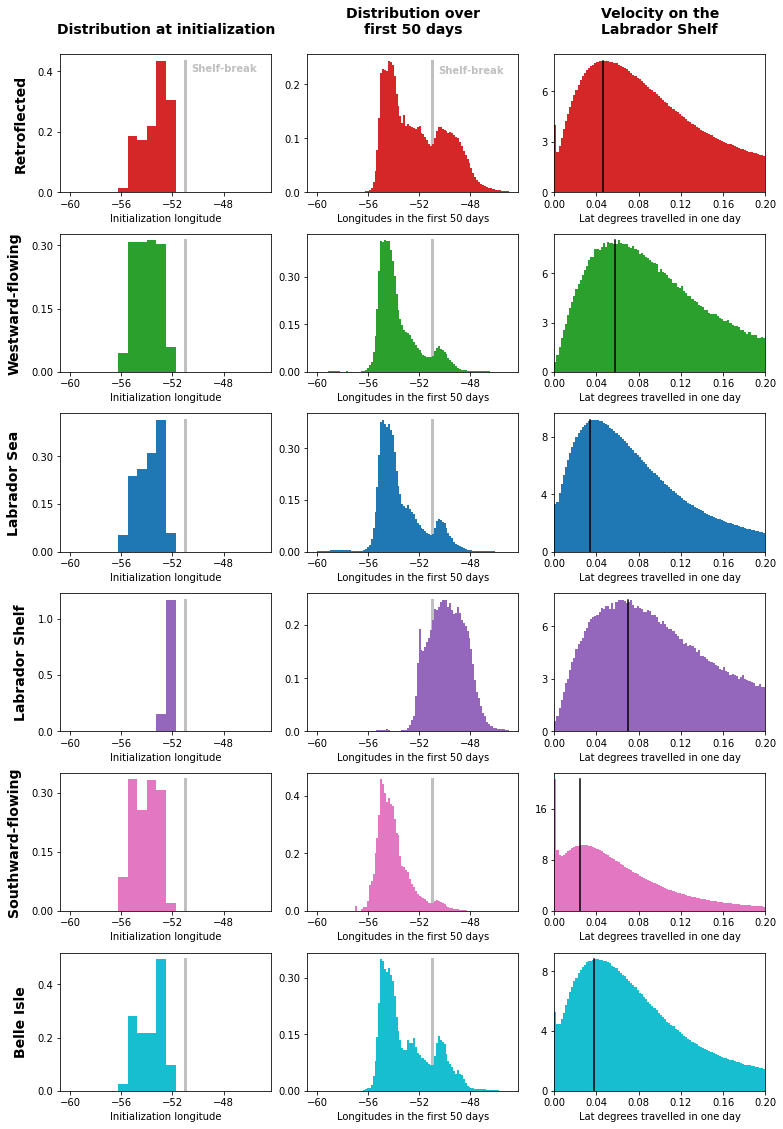

In [10]:
# All on one plot

fs = 14

num = ['(i)', '(ii)', '(iii)', '(iv)', '(v)', '(vi)', '(vii)', '(viii)', '(ix)', '(x)',
      '(xi)', '(xii)', '(xiii)', '(xiv)', '(xv)', '(xvi)', '(xvii)', '(xviii)', '(xix)', '(xx)',
      '(xxi)', '(xxii)', '(xxiii)', '(xxiv)', '(xv)', '(xvi)', '(xvii)', '(xviii)', '()']

f = plt.figure(figsize = (11,16))  
cc = 0
for c in range(len(Ls)):
    print(c, '/', len(Ls))
    ax = f.add_subplot(6,3,cc+1)
    h = ax.hist(lons_all_0[c], bins=20, range=[-60, -45], density=True, color=Col[c])
    ax.set_xlabel('Initialization longitude')
    #h = ax.hist(vel_all_shelf[c], bins=100, range=[0,0.2], density=True, color=Col[c])
    #ax.set_xlabel('Lat degrees travelled in one day')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax.plot([-51,-51],[0,max(h[0])], 'silver', linewidth=3, zorder=-1) #
    
    #m = h[1][np.argmax(h[0][2:])+1]
    #print('Max at %.3f'%m)
    #ax.plot([m,m],[0,max(h[0])], 'k')
    
    ax.set_ylabel(labels[c], fontsize=fs, fontweight='bold', labelpad=10)
    if cc<3:
        #ax.set_title('Velocity on the\nLabrador Shelf', fontsize=fs, weight='bold', pad=20)
        ax.set_title('Distribution at initialization', fontsize=fs, fontweight='bold', pad=20) #
        ax.text(-50.5, 0.4, 'Shelf-break', color='silver', fontweight='bold') #
    
    cc+=1

    ax = f.add_subplot(6,3,cc+1)
    h = ax.hist(lons_all_50[c], bins=100, range=[-60, -45], density=True, color=Col[c])
    ax.set_xlabel('Longitudes in the first 50 days')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax.plot([-51,-51],[0,max(h[0])], 'silver', linewidth=3, zorder=-1)
    if cc<3:
        ax.set_title('Distribution over\nfirst 50 days', fontsize=fs, fontweight='bold', pad=20)
        ax.text(-50.5, 0.22, 'Shelf-break', color='silver', fontweight='bold')
    
    cc+=1
    
    ax = f.add_subplot(6,3,cc+1)
    h = ax.hist(vel_all_shelf[c], bins=100, range=[0,0.2], density=True, color=Col[c]) #
    ax.set_xlim([0,0.2])
    ax.set_xlabel('Lat degrees travelled in one day') #
    #h = ax.hist(lons_all_0[c], bins=20, range=[-60, -45], density=True, color=Col[c])
    #ax.set_xlabel('Initialization longitude')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    #ax.plot([-51,-51],[0,max(h[0])], 'silver', linewidth=3, zorder=-1)
    
    m = h[1][np.argmax(h[0][2:])+1] #
    print('Max at %.3f'%m) #
    ax.plot([m,m],[0,max(h[0])], 'k') #
    
    if cc<3:
        ax.set_title('Velocity on the\nLabrador Shelf', fontsize=fs, weight='bold', pad=20) #
#        ax.set_title('Distribution at initialization', fontsize=fs, fontweight='bold', pad=20)
#        ax.text(-50.5, 0.4, 'Shelf-break', color='silver', fontweight='bold')
    
    ax.text(-61, 0.01, num[cc])
    
    cc+=1
    
#plt.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.99, top=0.95, wspace=0.17, hspace=0.3)
plt.savefig(path_figs+'vel_analysis_all.png', dpi=300)
plt.show()